

<img src="https://media.giphy.com/media/8cBhJBU2wlq6H6qY4W/giphy.gif">

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help

# The Attributess include:
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down:downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]



# Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction


# Importing all the libraries needed

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv(r"C:\DataScience\Project\Heart_attack_prediction\heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
string_col=df.select_dtypes("string").columns.to_list()

In [7]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# Exploratory Data Analysis

<img src="https://media.giphy.com/media/HUplkVCPY7jTW/giphy.gif">

## First Question should be why do we need this ??

Out Come of this phase is as given below : 

- Understanding the given dataset and helps clean up the given dataset.
- It gives you a clear picture of the features and the relationships between them.
- Providing guidelines for essential variables and leaving behind/removing non-essential variables.
- Handling Missing values or human error.
- Identifying outliers.
- EDA process would be maximizing insights of a dataset.
- This process is time-consuming but very effective,

## Correlation Matrix
### Its necessary to remove correlated variables to improve your model.One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
- Lighter shades represents positive correlation
- Darker shades represents negative correlation

In [9]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation wiht "Cholesterol", where as here positive correatlation with "Oldpeak","FastingBS" and "RestingBP"

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 207


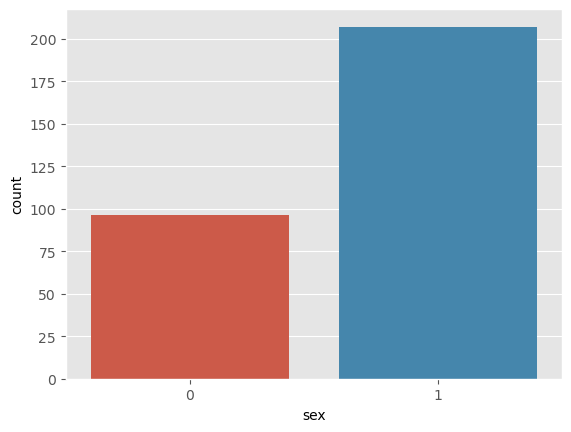

In [10]:
# Shows the Distribution of Heat Diseases with respect to male and female
x=(df.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=df, x="sex")
plt.show()


# 
- cp: Chest pain type
- 0 = Typical Angina
- 1 = Atypical Angina 
- 2 = Non-anginal Pain 
- 3 = Asymptomatic

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


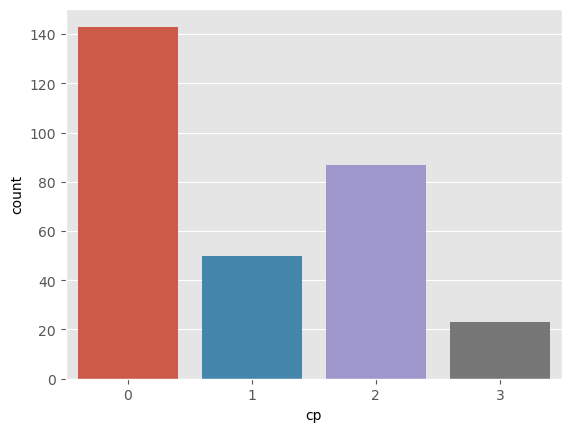

In [11]:
x=(df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()


#### :
- It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
- It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
- It can also be observed people with chest pain of type 0 is almost 50% of all the people.

### Breakdown of FBS


0    258
1     45
Name: fbs, dtype: int64


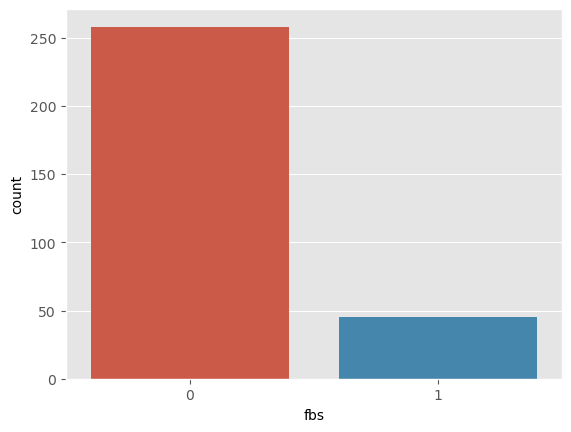

In [12]:
x=(df.fbs.value_counts())
print(x)
p = sns.countplot(data=df, x="fbs")
plt.show()

### Density distribution for Age



<Figure size 1000x1000 with 0 Axes>

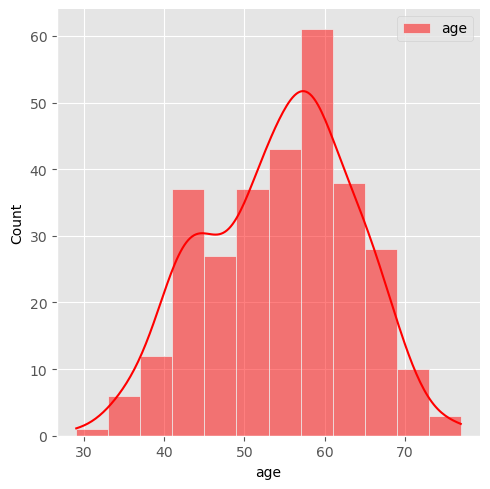

In [13]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="red", label="age", kde= True)
plt.legend()

### Density distribution is highest for age group 55 to 60


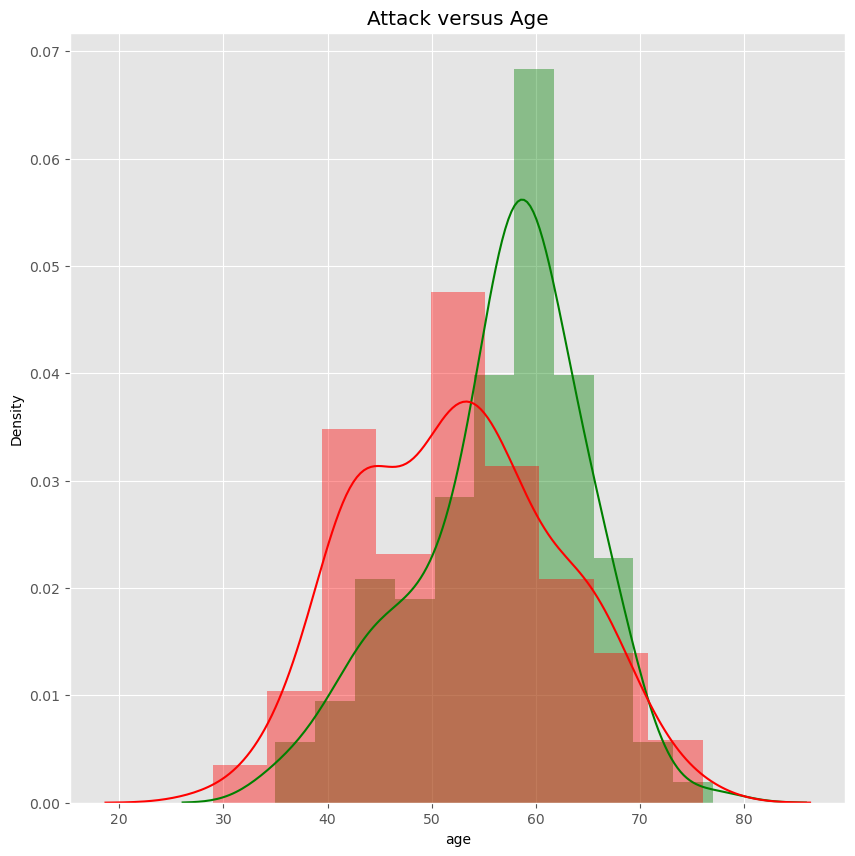

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

# Data preprocessing

In [15]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import accuracy_score, precision_score, recall_score
print("done")

done


In [17]:


X = df.drop('output', axis=1)
y = df.output


standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
models = {
    'Logistic Regression': LogisticRegression(),
    'xgb_classifier' : XGBClassifier(),
    'GaussianNB': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-NN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, verbose=0,loss_function='Logloss', random_seed=42),
    'SVM': SVC(),
    'Gradient Classifier' : GradientBoostingClassifier(random_state=0),
    'bernoulli naive bayes' : BernoulliNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')

    print('-' * 40)


Logistic Regression Metrics:
Accuracy: 0.87
Precision: 0.88
Recall: 0.88
----------------------------------------
xgb_classifier Metrics:
Accuracy: 0.82
Precision: 0.81
Recall: 0.85
----------------------------------------
GaussianNB Metrics:
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
----------------------------------------
Random Forest Metrics:
Accuracy: 0.83
Precision: 0.82
Recall: 0.88
----------------------------------------
K-NN Metrics:
Accuracy: 0.89
Precision: 0.90
Recall: 0.90
----------------------------------------
CatBoost Metrics:
Accuracy: 0.80
Precision: 0.84
Recall: 0.78
----------------------------------------
SVM Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.90
----------------------------------------
Gradient Classifier Metrics:
Accuracy: 0.76
Precision: 0.78
Recall: 0.78
----------------------------------------
bernoulli naive bayes Metrics:
Accuracy: 0.86
Precision: 0.84
Recall: 0.90
----------------------------------------


##
- All the models are performing very well except gradient classifier 
- Best of the lot is KNN and SVM